# Micro-Credit Defaulter Model

**Problem Statement:**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:
* There are no null values in the dataset. 
* There may be some customers with no loan history. 
* The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
* For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
* You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


## Importing requried libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [141]:
# to import dataset
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\fliprobo new intership\Micro Credit Project\Data file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


## Exploratory Data Analysis

In [142]:
#checking the overview information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [143]:
#checking the different coloumn names in the dataset.
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

* label- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	
* msisdn-	mobile number of user	
* aon-	age on cellular network in days	
* daily_decr30-	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	
* daily_decr90-	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	
* rental30-	Average main account balance over last 30 days	(Unsure of given definition)
* rental90-	Average main account balance over last 90 days	(Unsure of given definition)
* last_rech_date_ma- Number of days till last recharge of main account	
* last_rech_date_da- Number of days till last recharge of data account	
* last_rech_amt_ma- Amount of last recharge of main account (in Indonesian Rupiah)	
* cnt_ma_rech30- Number of times main account got recharged in last 30 days	
* fr_ma_rech30-	Frequency of main account recharged in last 30 days	Unsure of given definition
* sumamnt_ma_rech30- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
* medianamnt_ma_rech30- Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
* medianmarechprebal30-	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
* cnt_ma_rech90- Number of times main account got recharged in last 90 days	
* fr_ma_rech90-	Frequency of main account recharged in last 90 days	Unsure of given definition
* sumamnt_ma_rech90- Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
* medianamnt_ma_rech90-	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
* medianmarechprebal90-	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
* cnt_da_rech30- Number of times data account got recharged in last 30 days	
* fr_da_rech30-	Frequency of data account recharged in last 30 days	
* cnt_da_rech90- Number of times data account got recharged in last 90 days	
* fr_da_rech90-	Frequency of data account recharged in last 90 days	
* cnt_loans30-	Number of loans taken by user in last 30 days	
* amnt_loans30-	Total amount of loans taken by user in last 30 days	
* maxamnt_loans30- maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
* medianamnt_loans30- Median of amounts of loan taken by the user in last 30 days	
* cnt_loans90- Number of loans taken by user in last 90 days	
* amnt_loans90- Total amount of loans taken by user in last 90 days	
* maxamnt_loans90- maximum amount of loan taken by the user in last 90 days	
* medianamnt_loans90- Median of amounts of loan taken by the user in last 90 days	
* payback30- Average payback time in days over last 30 days	
* payback90- Average payback time in days over last 90 days	
* pcircle- telecom circle	
* pdate- date	


In [144]:
#checking if there are any null values present in the dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [145]:
#to understand unique values present in the dataset.
for i in df.columns:
    print('Name of attribute:',i,'\n',df[i].value_counts())
    print('*'*80)

Name of attribute: Unnamed: 0 
 2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64
********************************************************************************
Name of attribute: label 
 1    183431
0     26162
Name: label, dtype: int64
********************************************************************************
Name of attribute: msisdn 
 04581I85330    7
47819I90840    7
22038I88658    6
60744I91197    6
71742I90843    6
              ..
08737I90840    1
60991I70789    1
55858I88680    1
99530I89230    1
79480I89230    1
Name: msisdn, Length: 186243, dtype: int64
********************************************************************************
Name of attribute: aon 
 95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027     

Observations:
1. There are 209593 rows and 37 columns in the data sets which have different information in each attribute. There are no null values.
2. Basically there are 2 type of observations made i.e, customer behavior for 30 days and 90 days.
Two types of account held by customer main account, data account.
3. Target feature 'Label' has unbalanced data, we need to treat the target variable using sampling technique.
3. 'Unnamed: 0' attribute has all unique values as same as index columns which has no importance for analysis.
4. Approximately 90% of data in 'msisdn' has unique values, i.e, ID.
5. 'payback30','payback90' has nearly 50% of the values having 0.
6. More than 90% of 'last_rech_date_da', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'medianamnt_loans30','medianamnt_loans90',have 0 values.
7. 'pcircle' has only 1 unique value through out column and 'pdate' is a categorical column we can drop this column.

In [146]:
# to drop all the columns which have more than 90% of its values are equal to zero
df.drop(columns=['Unnamed: 0','msisdn','last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90','pcircle','pdate',], inplace=True, axis=1)

In [147]:
# to check dataframe after dropping columns
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333


In [148]:
# to change target column data type from int to object type, as target cloumn catains catagorical data. 
df['label']= df['label'].astype(str)

In [149]:
# to check data type
df['label'].dtypes

dtype('O')

# Visualization

In [150]:
# to analyse target variable and check unique values 
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [151]:
# to check for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['label']


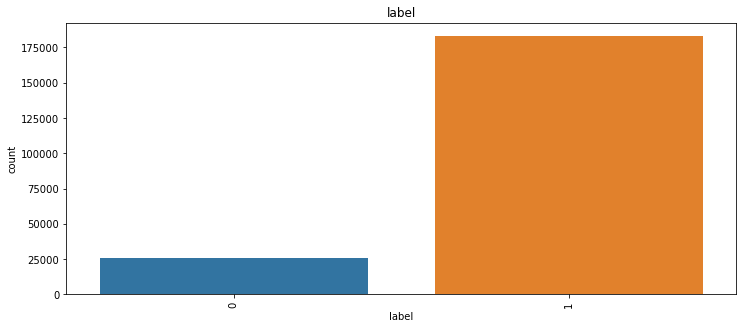

In [152]:
#Distribution plot for all categorical_columns
for i in df[categorical_columns]:              
    plt.figure(figsize = (12, 5))
    sns.countplot(x= df[i], data= df)
    plt.title(i)
    plt.xticks(rotation=90);
    plt.show()

There are 87.5% of non-defaulters and 12.5% of defaulter customers, the data is unbalanced we will use random oversampling technique to balance the target.

In [153]:
# to check for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']


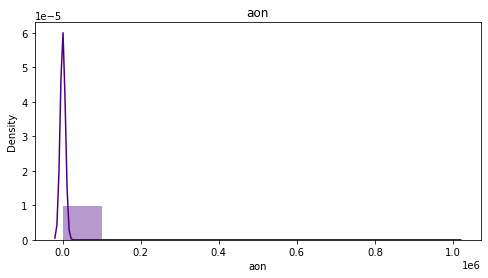

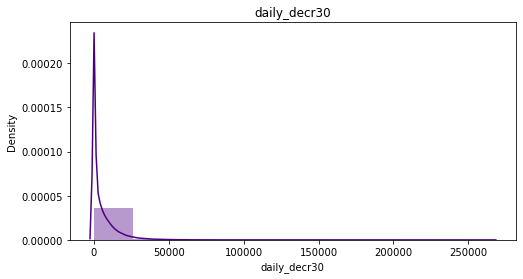

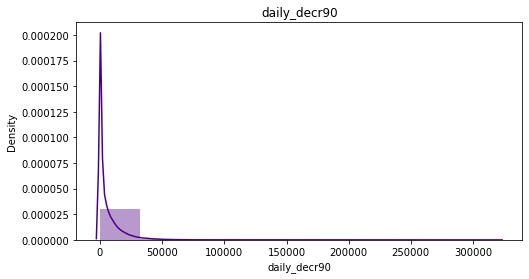

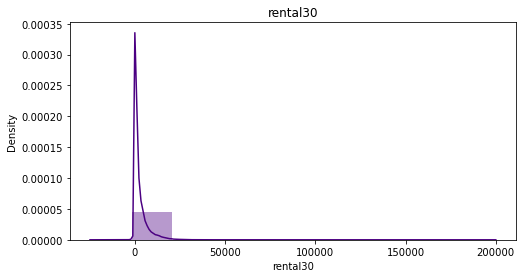

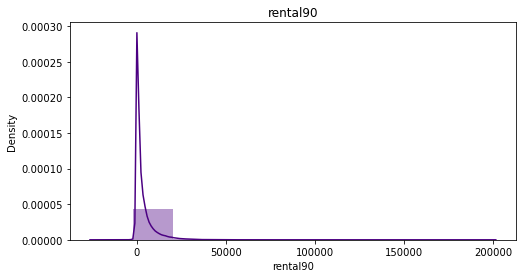

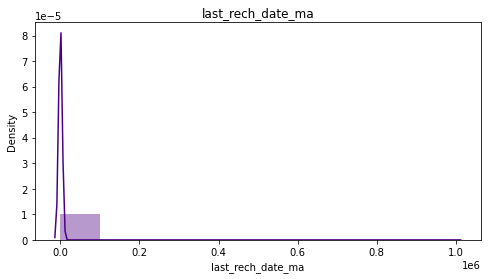

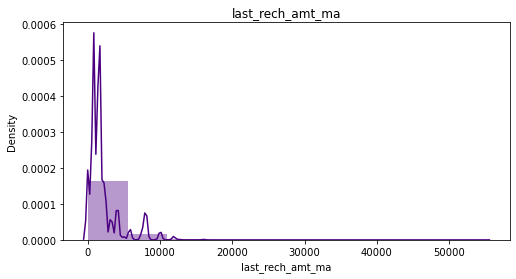

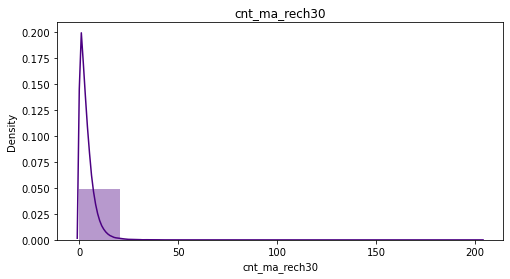

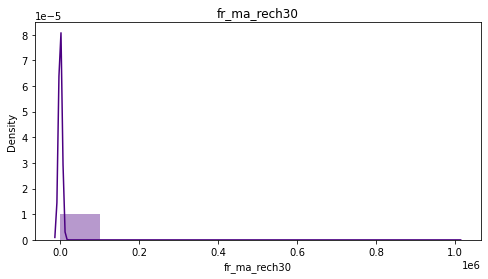

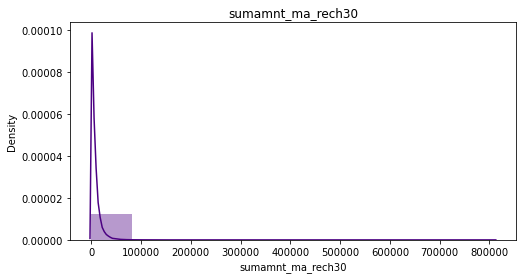

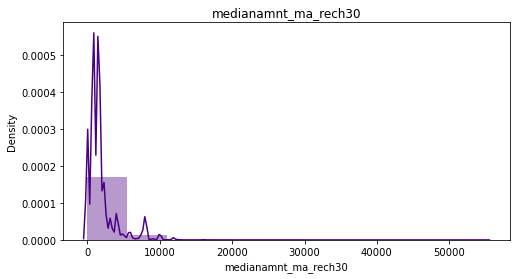

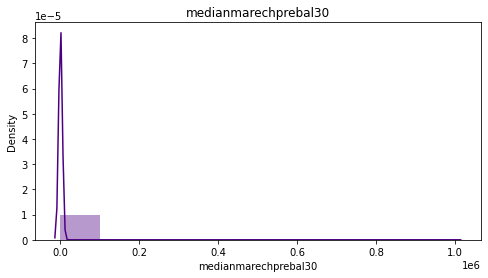

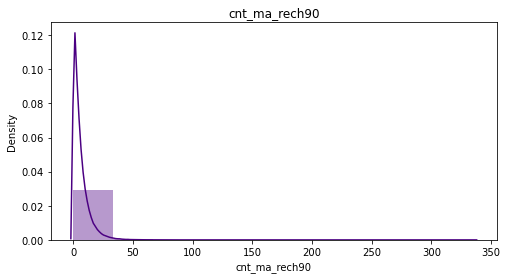

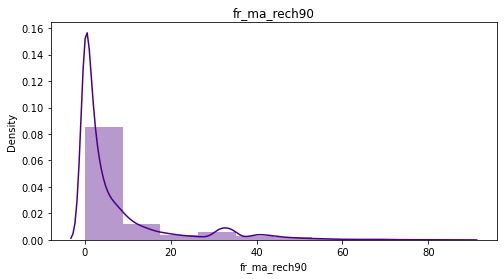

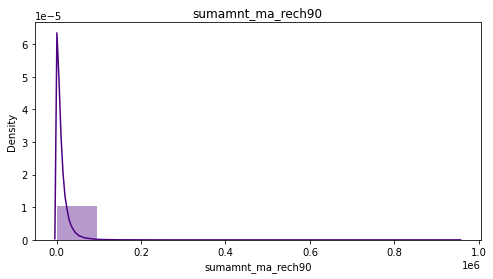

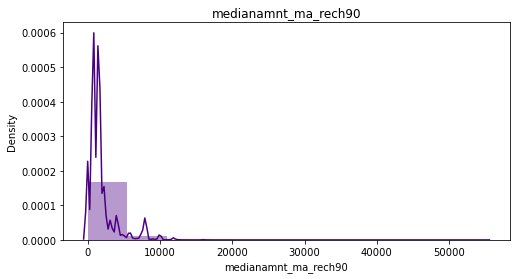

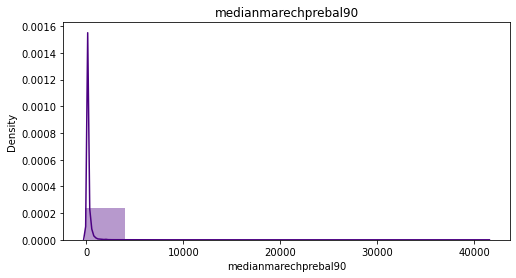

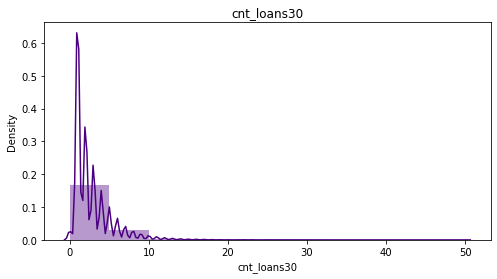

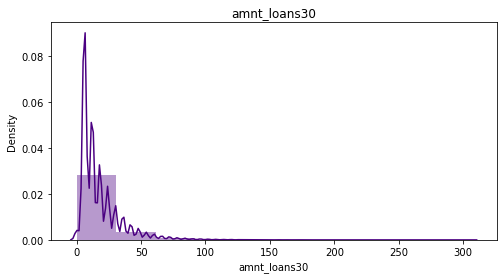

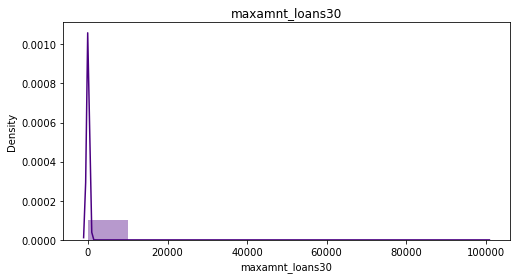

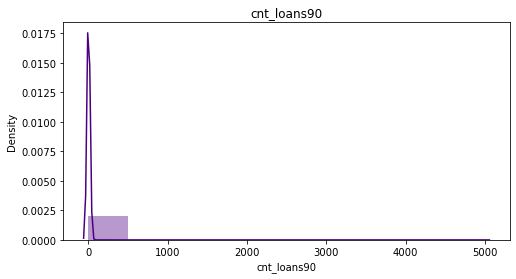

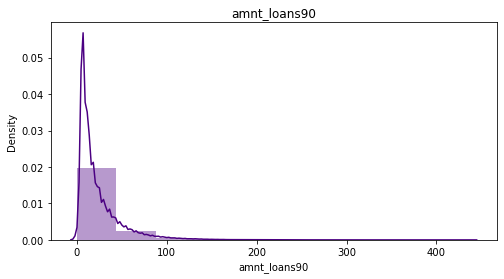

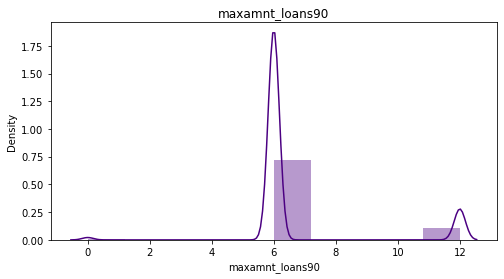

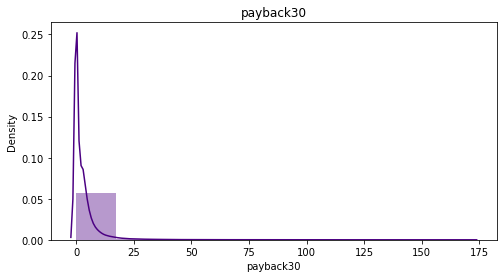

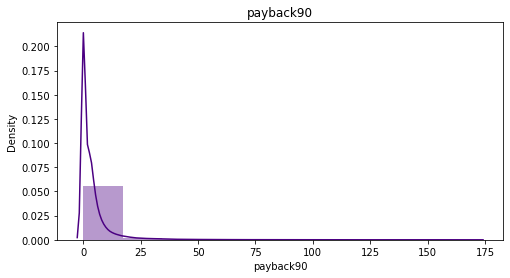

In [154]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

* Skewness is present in all the columns.
* Data in all the columns are widely spread.
* In most of the columns data is concentrated at some particular values.


In [155]:
# to Check statistical description of data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.000000,0.000,2.000000,6.00,999606.368132
sumamnt_ma_rech30,209593.0,7704.501157,10139.621714,0.000000,1540.000,4628.000000,10010.00,810096.000000


## DATA CLEANING

In [157]:
# to separate target column from the dataset
x = df_new.drop("label",axis=1)
y = df_new["label"]

In [158]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,...,3078,1539.0,7.50,2,12,2.0,12,6,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,...,5787,5787.0,61.04,1,12,1.0,12,12,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,...,1539,1539.0,66.32,1,6,1.0,6,6,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,...,947,947.0,2.50,2,12,2.0,12,6,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,...,23496,2888.0,35.00,7,42,7.0,42,6,2.333333,2.333333


In [159]:
y.value_counts()

1    166016
0     24480
Name: label, dtype: int64

In [160]:
#cheking the skewness present in the dataset
x.skew()

aon                     0.947781
daily_decr30            1.925020
daily_decr90            1.971887
rental30                4.648091
rental90                4.425794
last_rech_date_ma       3.072841
last_rech_amt_ma        2.782168
cnt_ma_rech30           2.013788
fr_ma_rech30            2.018828
sumamnt_ma_rech30       1.581926
medianamnt_ma_rech30    2.738365
cnt_ma_rech90           2.120064
fr_ma_rech90            2.248710
sumamnt_ma_rech90       1.620292
medianamnt_ma_rech90    3.080797
medianmarechprebal90    3.649804
cnt_loans30             2.314838
amnt_loans30            2.328490
cnt_loans90             2.525641
amnt_loans90            2.522205
maxamnt_loans90         1.796370
payback30               2.675176
payback90               2.573556
dtype: float64

In [161]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [162]:
#creating new dataset after removing skewness and saving it to 'x'
x = pd.DataFrame(x_new , columns = x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.720537,0.406269,0.372477,-0.573150,-0.561154,-0.369850,0.125803,-0.247109,1.707064,-0.150368,...,-0.433660,0.193643,-0.516847,0.037785,-0.072077,-0.162869,-0.225652,-0.265129,1.853342,1.889153
1,0.251504,1.244461,1.172921,0.421972,0.220547,1.412030,1.590322,-0.774795,-1.106041,0.284458,...,-0.049725,1.791764,-0.009346,-0.900236,-0.072077,-1.019813,-0.225652,2.453975,-0.914966,-0.992246
2,-0.105479,0.046747,0.024940,-0.338120,-0.384248,-0.248628,0.125803,-0.774795,-1.106041,-0.533407,...,-0.773352,0.193643,0.035326,-0.900236,-0.885763,-1.019813,-0.993254,-0.265129,-0.914966,-0.992246
3,-0.803892,-1.016114,-1.009002,-0.598009,-0.594217,3.113465,-0.257737,-1.663606,-1.106041,-1.881805,...,-0.969435,-0.218289,-0.577913,0.037785,-0.072077,-0.162869,-0.225652,-0.265129,-0.914966,-0.992246
4,0.683403,-0.658306,-0.658421,-0.276664,-0.334981,-0.132947,0.502287,1.053524,0.188091,1.458645,...,1.145778,0.853979,-0.239626,1.614041,1.533234,1.262676,1.157807,-0.265129,0.693570,0.487825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190491,-0.395219,-0.656363,-0.656526,-0.279620,-0.337349,-0.498949,1.123615,0.130809,0.188091,0.779155,...,0.385318,0.968893,0.244243,0.037785,-0.072077,-0.162869,-0.225652,-0.265129,0.142953,-0.054768
190492,0.903716,-0.933411,-0.927649,-0.092881,-0.188154,-0.132947,-0.399109,0.425974,-0.242663,-0.147558,...,-0.278212,-0.369240,0.401893,0.589271,0.432446,0.338244,0.227118,-0.265129,0.142953,-0.054768
190493,0.798136,1.227718,1.160329,0.937797,1.153251,-0.248628,0.125803,0.668465,1.131550,0.680198,...,0.906187,0.193643,-0.129995,0.961821,1.533234,1.111101,1.426974,2.453975,1.029301,0.818529
190494,1.923751,1.266017,1.198085,-0.500954,-0.363100,-0.369850,-0.399109,0.668465,0.663923,0.927292,...,0.871287,0.647987,0.309402,0.037785,0.432446,0.338244,0.546394,2.453975,-0.914966,1.423608


In [163]:
#to check the skewness in the dataset after applying power transformation
x.skew()

aon                     0.303816
daily_decr30           -6.266621
daily_decr90           -6.662173
rental30                0.735510
rental90                0.728162
last_rech_date_ma       0.124899
last_rech_amt_ma       -0.095180
cnt_ma_rech30          -0.004265
fr_ma_rech30            0.144900
sumamnt_ma_rech30      -0.428558
medianamnt_ma_rech30   -0.228557
cnt_ma_rech90          -0.008501
fr_ma_rech90            0.147100
sumamnt_ma_rech90      -0.335178
medianamnt_ma_rech90   -0.079480
medianmarechprebal90    0.982632
cnt_loans30             0.038042
amnt_loans30            0.004469
cnt_loans90             0.098550
amnt_loans90           -0.006178
maxamnt_loans90         0.402290
payback30               0.307794
payback90               0.209186
dtype: float64

In [164]:
#Checking dataloss in power transformation method
Dataloss = (((209593-190496)/209593)*100)
Dataloss

9.111468417361266

Data loss is below 10% so, we can use power transformation method.

In [165]:
# to drop column with high skewness
x.drop(columns=['daily_decr30','daily_decr90'], inplace=True, axis=1)

In [166]:
#to check if skweness is lying between -0.5 to 0.5
x.skew()[np.abs(x.skew()) < 0.5].all()

True

aon                        AxesSubplot(0.125,0.787927;0.168478x0.0920732)
rental30                AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
rental90                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
last_rech_date_ma       AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
last_rech_amt_ma           AxesSubplot(0.125,0.677439;0.168478x0.0920732)
cnt_ma_rech30           AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
fr_ma_rech30            AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
sumamnt_ma_rech30       AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
medianamnt_ma_rech30       AxesSubplot(0.125,0.566951;0.168478x0.0920732)
cnt_ma_rech90           AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
fr_ma_rech90            AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
sumamnt_ma_rech90       AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
medianamnt_ma_rech90       AxesSubplot(0.125,0.456463;0.168478x0.0920732)
medianmarechprebal90    AxesSubplot(0.

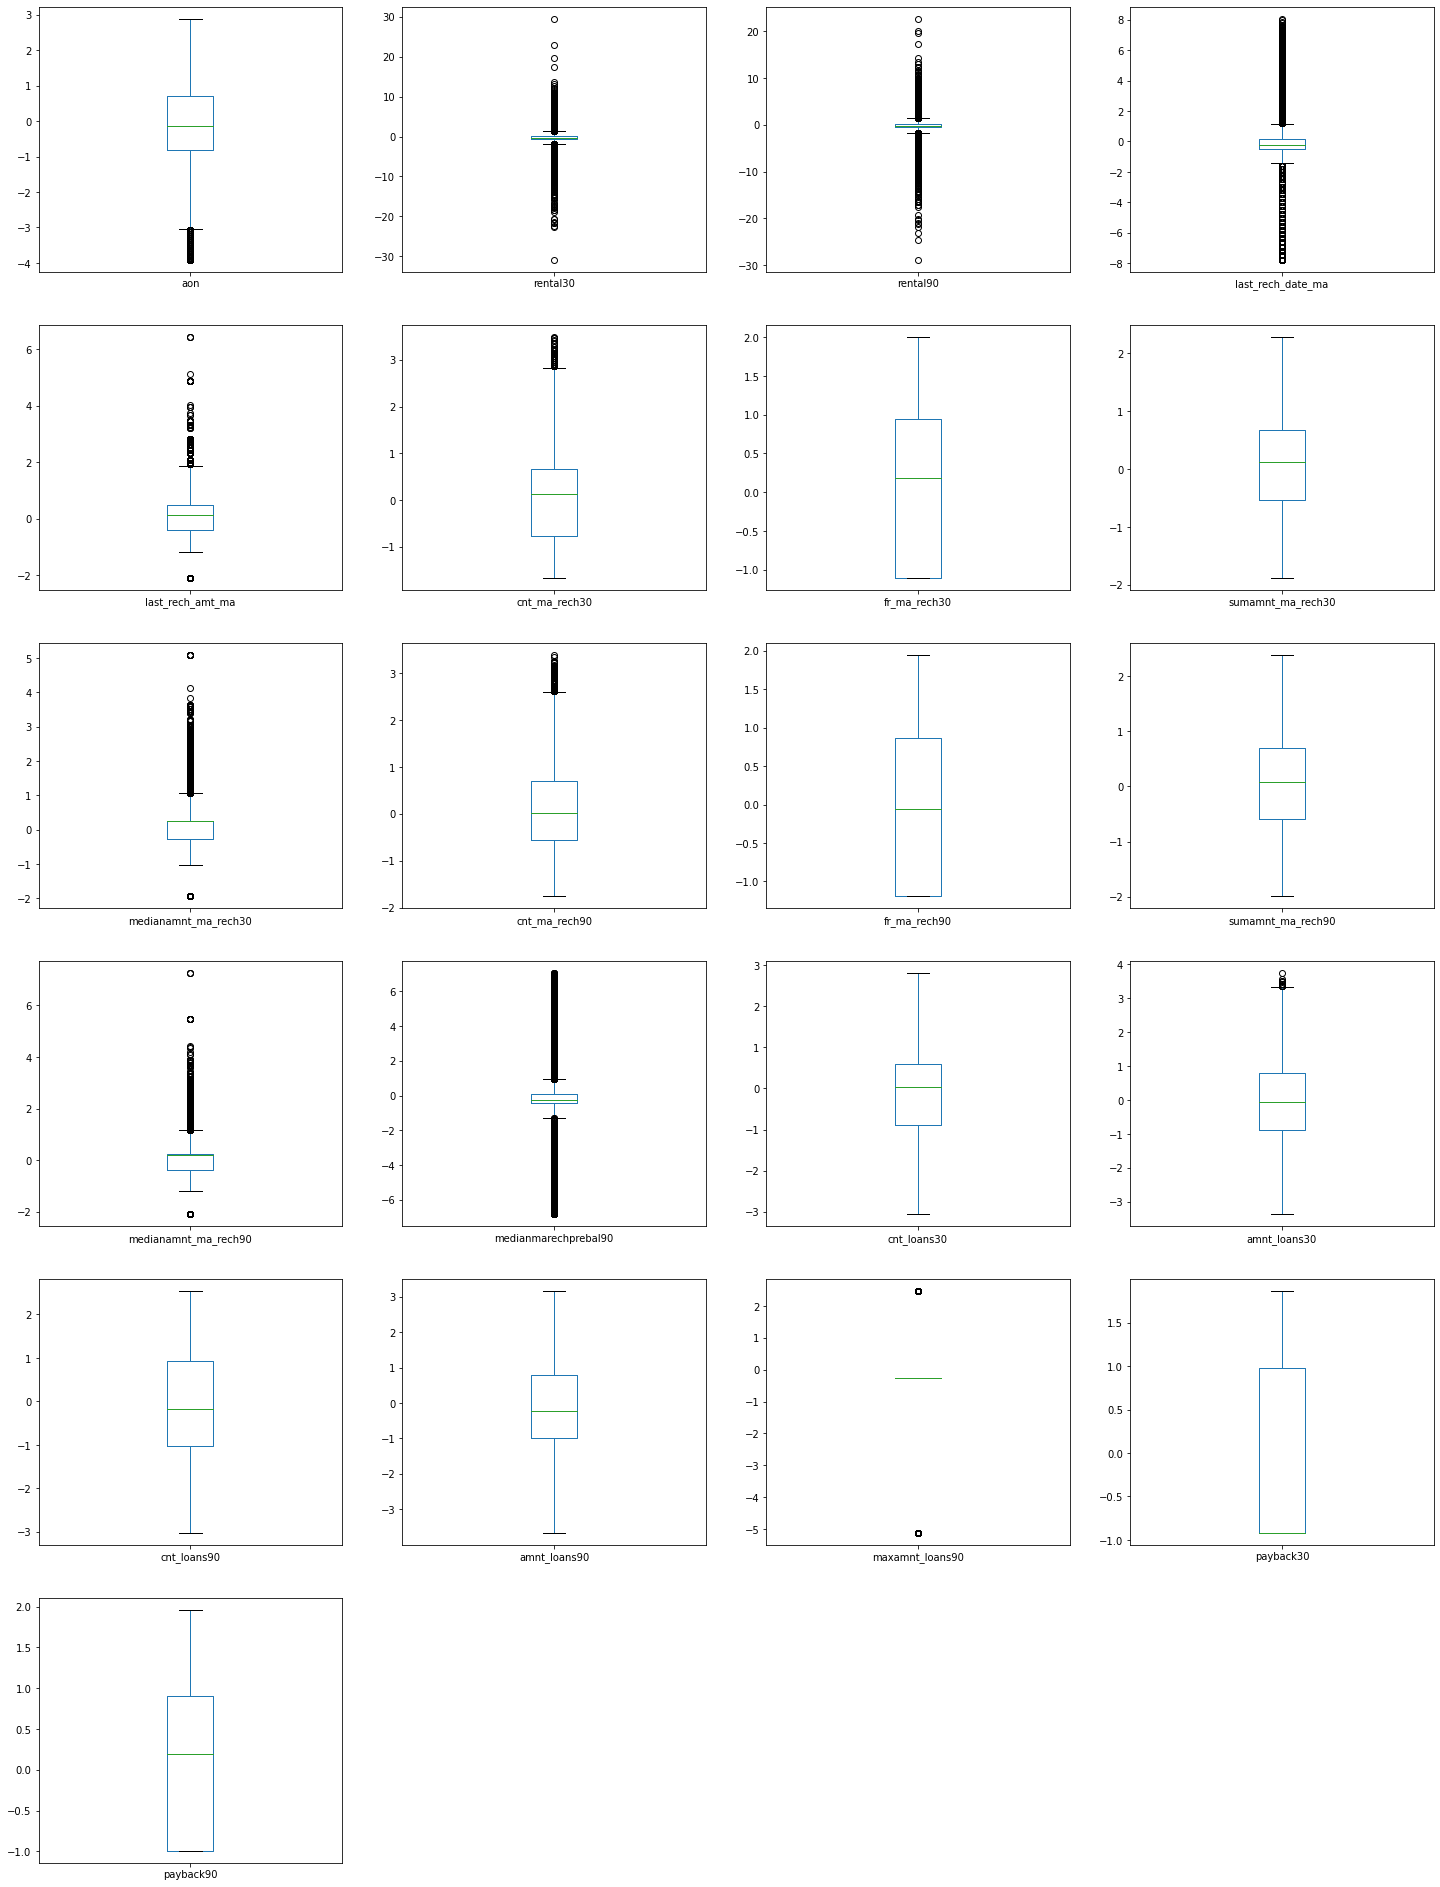

In [185]:
# to find out outliers in the dataset
x.plot(kind='box',subplots=True,layout=(7,4),figsize=(25,40))

In most of the columns outliers are present.

In [186]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(x)) < 3).all()

False

In [187]:
#to remove outliers in data set through zscore
z = np.abs(zscore(x))
z.shape

(190496, 21)

In [188]:
threshold = 3
print(np.where(z>3))

(array([     3,     23,     23, ..., 190484, 190484, 190484], dtype=int64), array([ 3,  1,  2, ..., 16, 17, 18], dtype=int64))


In [189]:
x_new = x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(190496, 21)
(172552, 21)


In [190]:
#to find % loss in data
loss = (1359-1322)/1359 * 100
print(loss)

2.7225901398086827


aon                        AxesSubplot(0.125,0.787927;0.168478x0.0920732)
rental30                AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
rental90                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
last_rech_date_ma       AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
last_rech_amt_ma           AxesSubplot(0.125,0.677439;0.168478x0.0920732)
cnt_ma_rech30           AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
fr_ma_rech30            AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
sumamnt_ma_rech30       AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
medianamnt_ma_rech30       AxesSubplot(0.125,0.566951;0.168478x0.0920732)
cnt_ma_rech90           AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
fr_ma_rech90            AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
sumamnt_ma_rech90       AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
medianamnt_ma_rech90       AxesSubplot(0.125,0.456463;0.168478x0.0920732)
medianmarechprebal90    AxesSubplot(0.

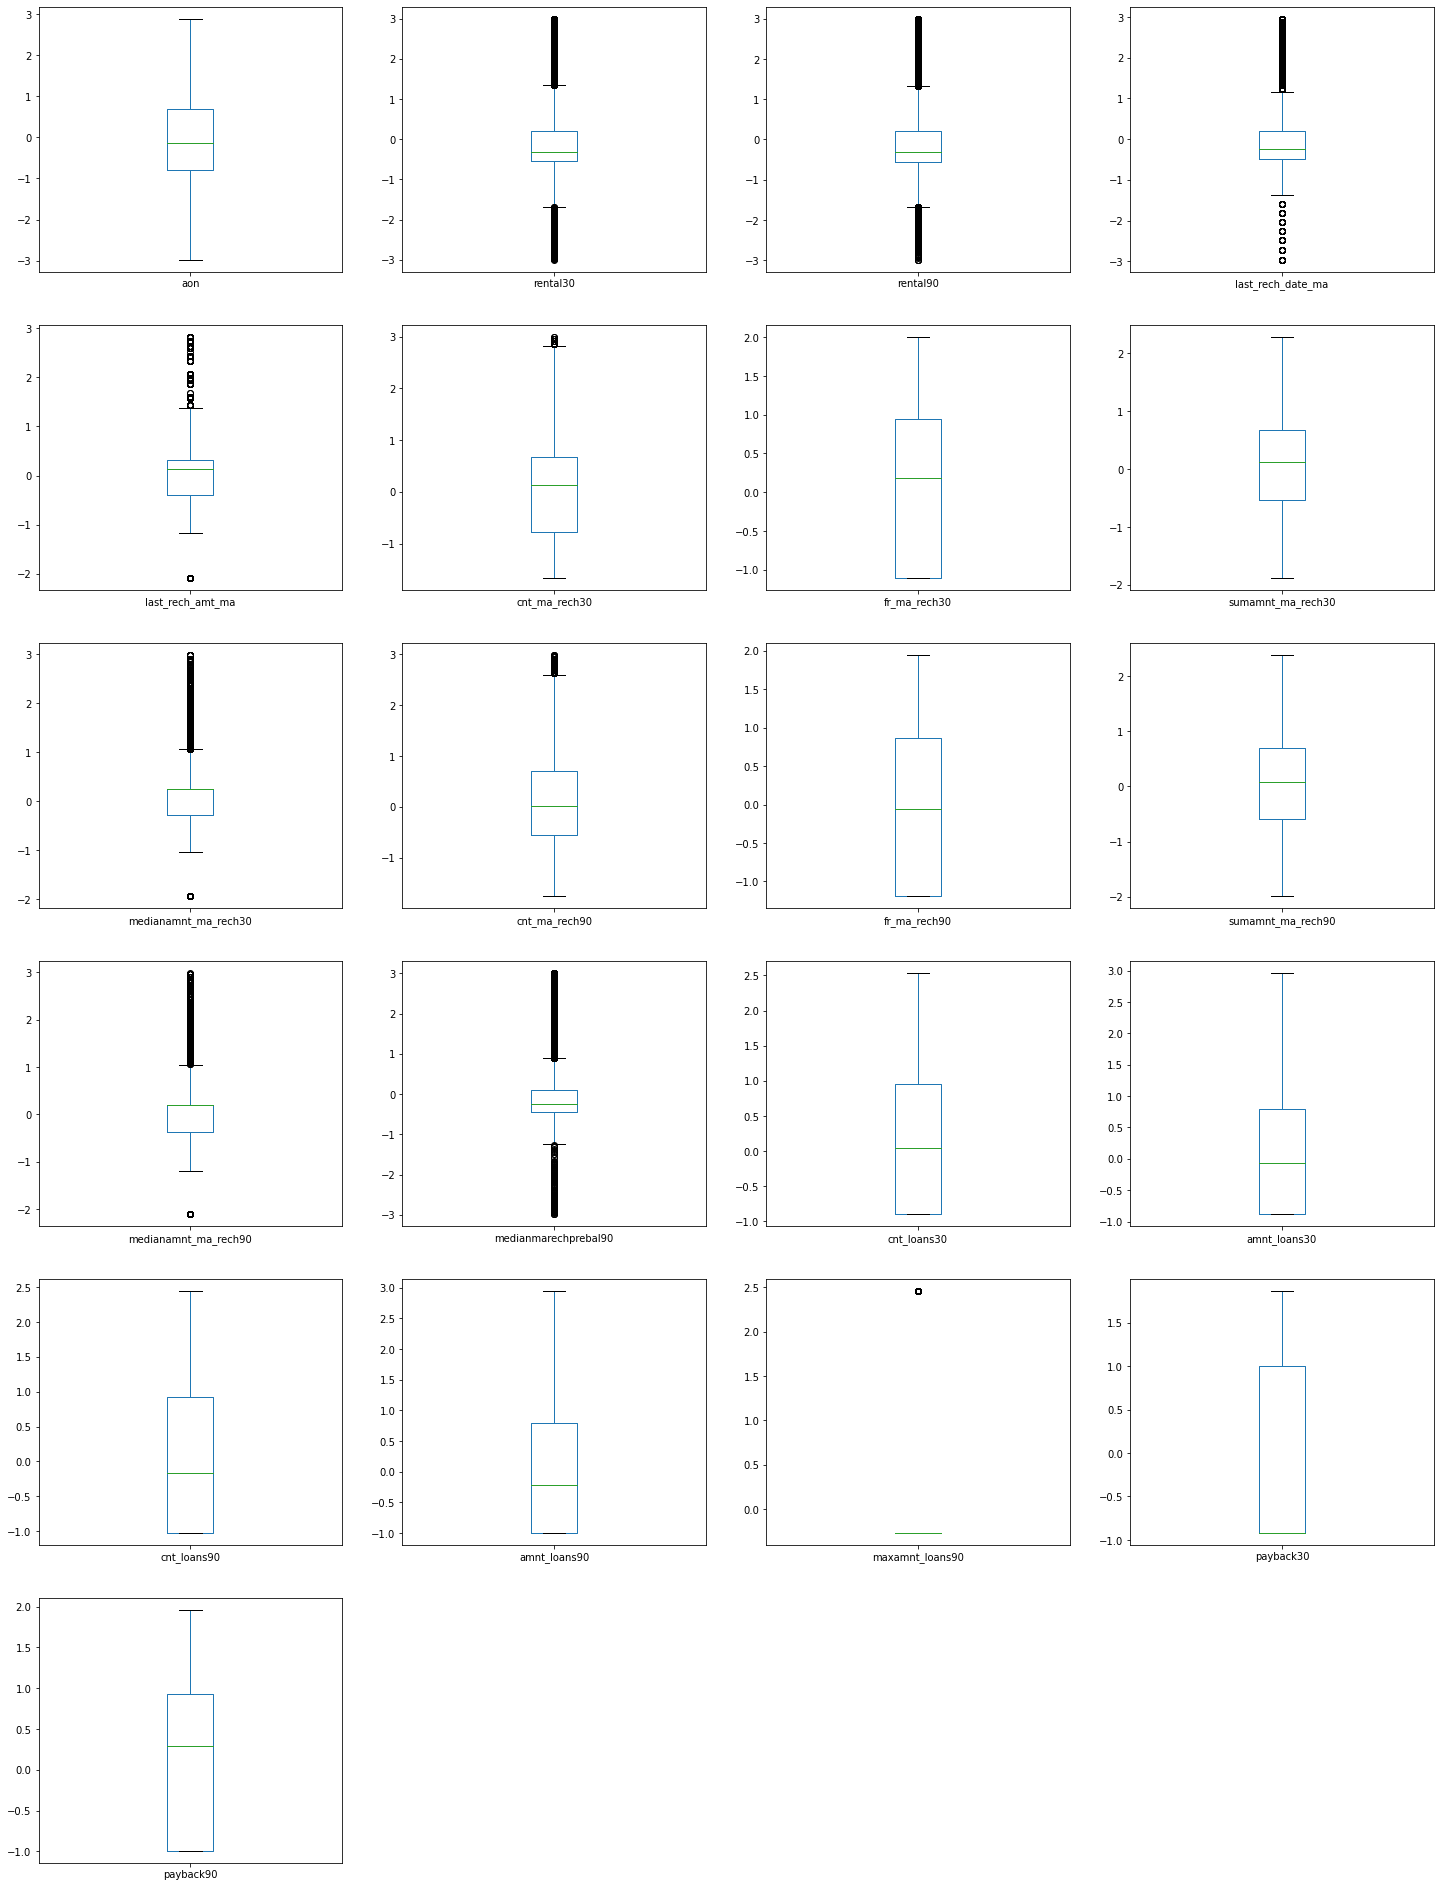

In [191]:
# visualization for outliers after using zscore
x_new.plot(kind='box',subplots=True,layout=(7,4),figsize=(25,40))

We can see that there is reduction in outliers.however,rental30, rental90,last_rech_date_ma,last_rech_amt_ma, cnt_ma_reach30, cnt_ma_reach90, medianamnt_ma_rech90,medianmarechprebal90 still have many outliers.

In [193]:
cor=x.corr()
cor

,aon,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
aon,1.000000,0.065291,0.068477,0.027241,0.093455,0.036839,0.066129,0.079490,0.090725,0.058232,...,0.099862,0.098424,0.018781,0.069650,0.071403,0.105361,0.105219,0.038653,0.068365,0.092774
rental30,0.065291,1.000000,0.962132,0.001439,0.120965,0.232743,0.113615,0.237275,0.124694,0.301130,...,0.299652,0.108782,0.002809,0.152133,0.186555,0.239016,0.259311,0.184019,0.168608,0.202188
rental90,0.068477,0.962132,1.000000,0.010301,0.122558,0.232202,0.120452,0.234202,0.123307,0.327533,...,0.321540,0.109189,0.003585,0.142234,0.180275,0.254394,0.276580,0.196516,0.171452,0.217534
last_rech_date_ma,0.027241,0.001439,0.010301,1.000000,0.270235,-0.240558,-0.160751,-0.170509,-0.034314,-0.097217,...,0.024387,0.260128,0.064773,-0.198316,-0.191123,-0.154588,-0.153282,-0.037191,-0.183187,-0.129475
last_rech_amt_ma,0.093455,0.120965,0.122558,0.270235,1.000000,0.313683,0.277780,0.642524,0.809401,0.363090,...,0.691410,0.905638,0.236012,0.138149,0.150438,0.185256,0.188012,0.121766,0.147435,0.186335
cnt_ma_rech30,0.036839,0.232743,0.232202,-0.240558,0.313683,1.000000,0.450755,0.859113,0.410641,0.920113,...,0.776489,0.277511,0.106789,0.696959,0.690763,0.693385,0.683760,0.163804,0.569139,0.519045
fr_ma_rech30,0.066129,0.113615,0.120452,-0.160751,0.277780,0.450755,1.000000,0.492499,0.386205,0.442032,...,0.455649,0.293658,0.041844,0.320487,0.304644,0.356361,0.340008,0.098089,0.425113,0.407077
sumamnt_ma_rech30,0.079490,0.237275,0.234202,-0.170509,0.642524,0.859113,0.492499,1.000000,0.771113,0.799691,...,0.904091,0.622373,0.181348,0.565426,0.574817,0.583740,0.584558,0.213608,0.468539,0.449283
medianamnt_ma_rech30,0.090725,0.124694,0.123307,-0.034314,0.809401,0.410641,0.386205,0.771113,1.000000,0.389291,...,0.681201,0.841337,0.206610,0.192737,0.202158,0.236195,0.237918,0.138578,0.196778,0.234653
cnt_ma_rech90,0.058232,0.301130,0.327533,-0.097217,0.363090,0.920113,0.442032,0.799691,0.389291,1.000000,...,0.867240,0.320533,0.119351,0.648218,0.653427,0.730311,0.726577,0.206228,0.545673,0.546139


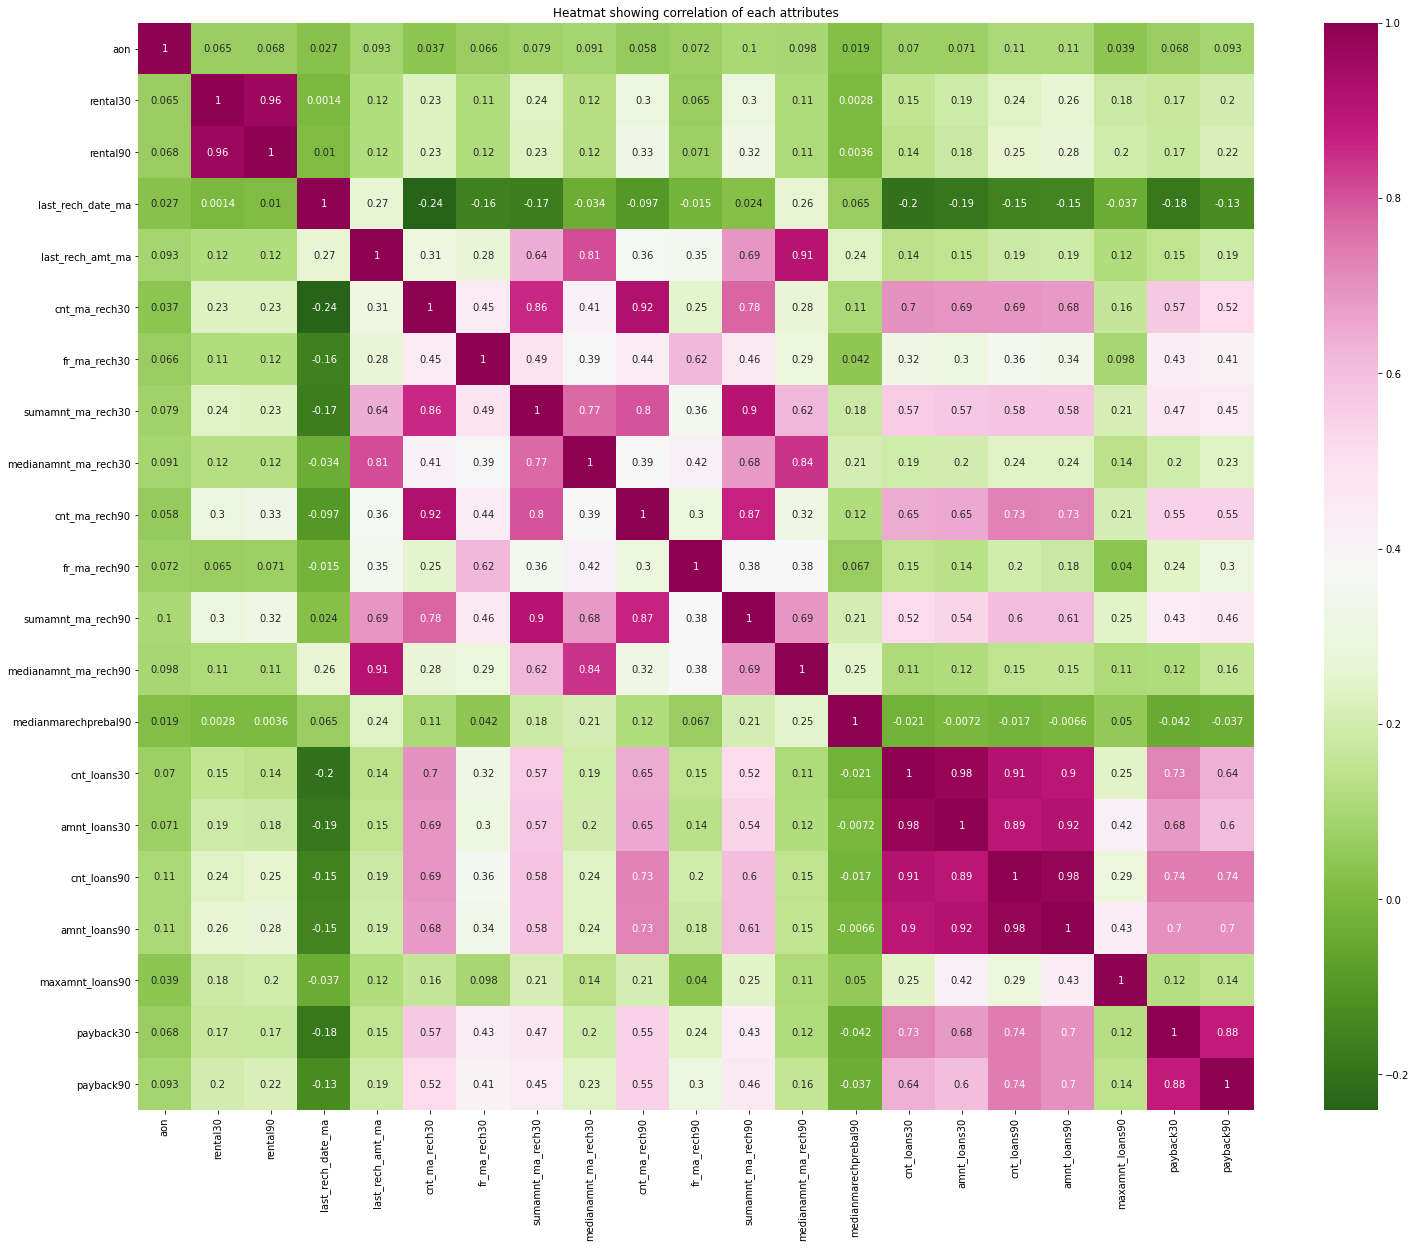

In [192]:
corr = x.corr()
plt.figure(figsize=(25,20), facecolor='white')
sns.heatmap(corr, annot=True, cmap='PiYG_r')
plt.title('Heatmat showing correlation of each attributes')
plt.show()

Observations:
* There are many multicollinearity issuse in the dataset.
* amnt_loans90,cnt_loans90,amnt_loans30,sumamnt_ma_rech30 columns have high multicollinearity issues.
* We can understand that these values have less importance towards the model inference. Let us proceed by dropping these columns from the dataset.

In [194]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [195]:
X.head()

,aon,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.720537,-0.573150,-0.561154,-0.369850,0.125803,-0.247109,1.707064,-0.150368,0.256017,-0.553802,...,-0.433660,0.193643,-0.516847,0.037785,-0.072077,-0.162869,-0.225652,-0.265129,1.853342,1.889153
1,0.251504,0.421972,0.220547,1.412030,1.590322,-0.774795,-1.106041,0.284458,1.733417,-1.004414,...,-0.049725,1.791764,-0.009346,-0.900236,-0.072077,-1.019813,-0.225652,2.453975,-0.914966,-0.992246
2,-0.105479,-0.338120,-0.384248,-0.248628,0.125803,-0.774795,-1.106041,-0.533407,0.256017,-1.004414,...,-0.773352,0.193643,0.035326,-0.900236,-0.885763,-1.019813,-0.993254,-0.265129,-0.914966,-0.992246
3,-0.803892,-0.598009,-0.594217,3.113465,-0.257737,-1.663606,-1.106041,-1.881805,-1.939564,-1.004414,...,-0.969435,-0.218289,-0.577913,0.037785,-0.072077,-0.162869,-0.225652,-0.265129,-0.914966,-0.992246
4,0.683403,-0.276664,-0.334981,-0.132947,0.502287,1.053524,0.188091,1.458645,0.634710,0.710469,...,1.145778,0.853979,-0.239626,1.614041,1.533234,1.262676,1.157807,-0.265129,0.693570,0.487825


In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.031169,aon
1,14.429688,rental30
2,15.238861,rental90
3,1.692112,last_rech_date_ma
4,6.648501,last_rech_amt_ma
5,52.701820,cnt_ma_rech30
6,2.097426,fr_ma_rech30
7,74.345103,sumamnt_ma_rech30
8,16.327300,medianamnt_ma_rech30
9,56.073503,cnt_ma_rech90


In [197]:
#Droping high VIF columns
X = X.drop(["amnt_loans90","cnt_loans90"],axis=1)

In [198]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.025513,aon
1,14.359235,rental30
2,15.100932,rental90
3,1.688601,last_rech_date_ma
4,6.631004,last_rech_amt_ma
5,51.420893,cnt_ma_rech30
6,2.096992,fr_ma_rech30
7,74.342141,sumamnt_ma_rech30
8,16.259642,medianamnt_ma_rech30
9,53.950279,cnt_ma_rech90


In [199]:
#Droping high VIF columns
X = X.drop(["amnt_loans30","sumamnt_ma_rech30"],axis=1)

In [200]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.025437,aon
1,14.303945,rental30
2,15.021564,rental90
3,1.686766,last_rech_date_ma
4,6.445619,last_rech_amt_ma
5,10.633696,cnt_ma_rech30
6,2.065335,fr_ma_rech30
7,5.367063,medianamnt_ma_rech30
8,22.562122,cnt_ma_rech90
9,1.867643,fr_ma_rech90


In [203]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.024929,aon
1,14.011634,rental30
2,14.646269,rental90
3,1.586882,last_rech_date_ma
4,6.431259,last_rech_amt_ma
5,5.495990,cnt_ma_rech30
6,2.061588,fr_ma_rech30
7,5.226522,medianamnt_ma_rech30
8,1.834267,fr_ma_rech90
9,8.311399,sumamnt_ma_rech90


In [204]:
X.shape

(190496, 16)

In [205]:
#Checking the value count of target column
y.value_counts()

1    166016
0     24480
Name: label, dtype: int64

In [206]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [207]:
# Checking the value counts again
y.value_counts()

0    166016
1    166016
Name: label, dtype: int64

In [208]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [209]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = ExtraTreesClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9314827828531272  on Random_state  96


In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [211]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

### i) RandomForestClassifier:

In [212]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.9206404979419737
Confusion Matrix: [[46202  3387]
 [ 4518 45503]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     49589
           1       0.93      0.91      0.92     50021

    accuracy                           0.92     99610
   macro avg       0.92      0.92      0.92     99610
weighted avg       0.92      0.92      0.92     99610



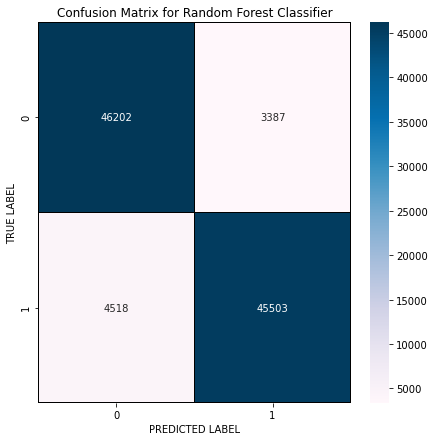

In [213]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = [0,1]
y_axis_labels = [0,1]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### ii) ExtraTreeClassifier:

In [214]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
predet=ETC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predet))
print('Confusion Matrix:',confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

Accuracy Score: 0.9315229394639093
Confusion Matrix: [[47220  2369]
 [ 4452 45569]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     49589
           1       0.95      0.91      0.93     50021

    accuracy                           0.93     99610
   macro avg       0.93      0.93      0.93     99610
weighted avg       0.93      0.93      0.93     99610



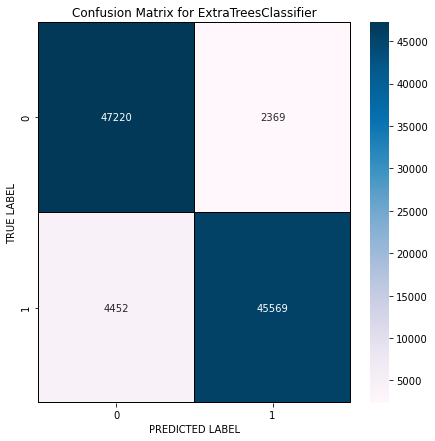

In [215]:
cm = confusion_matrix(y_test, predet)

x_axis_labels = [0,1]
y_axis_labels = [0,1]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')
plt.show()

### iii) Gradient Boosting Classifier:

In [216]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8580865374962353
Confusion Matrix: [[43971  5618]
 [ 8518 41503]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     49589
           1       0.88      0.83      0.85     50021

    accuracy                           0.86     99610
   macro avg       0.86      0.86      0.86     99610
weighted avg       0.86      0.86      0.86     99610



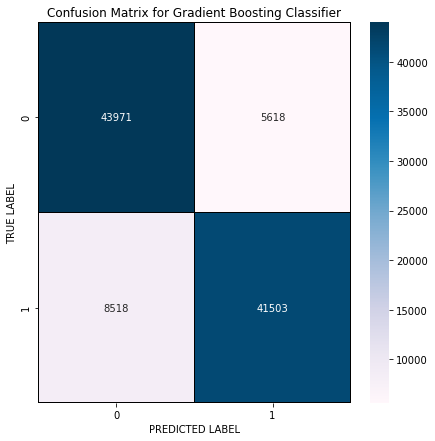

In [217]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = [0,1]
y_axis_labels = [0,1]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### iv) SupportVectorClassifier:

In [218]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7956128902720611
Confusion Matrix: [[40807  8782]
 [11577 38444]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     49589
           1       0.81      0.77      0.79     50021

    accuracy                           0.80     99610
   macro avg       0.80      0.80      0.80     99610
weighted avg       0.80      0.80      0.80     99610



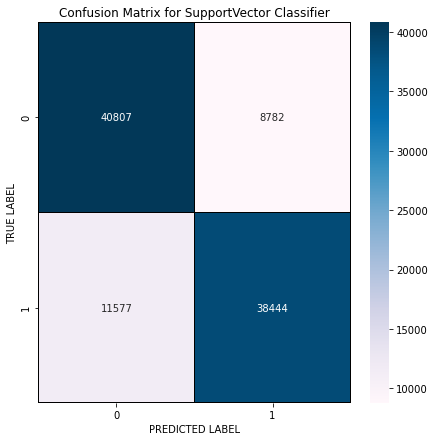

In [219]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = [0,1]
y_axis_labels = [0,1]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SupportVector Classifier')
plt.show()

**ExtraTreeClassified gave best accuracy score of 93.1**

## Cross validation scores:

In [220]:
#Importing library
from sklearn.model_selection import cross_val_score

In [221]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.9198181579179041


In [222]:
# cv score for Extra Trees Classifier
print(cross_val_score(ETC,X,y,cv=5).mean())

0.9354400140829953


In [223]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8554959891519388


In [224]:
# cv score for Support vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.7957516238243819


**After cross validation ExtraTreeClassifier gave best accuray score of 93.5**

## Hyper Parameter tuning:

In [225]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [226]:
# Giving the parameters list for ETC model.
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,12,15,20,22],
             'n_estimators':[500,700,1000,1200],
             'max_features':['aoto','sqrt','log2'],
             'min_samples_split': [2]}

In [227]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [228]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [500, 700, 1000, 1200]})

In [229]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [230]:
Final_mod=ExtraTreesClassifier(criterion='gini', max_depth=22,max_features='log2', min_samples_split=2, n_estimators=1000)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 86.52042967573537
Confusion matrix: [[45224  4365]
 [ 9062 40959]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     49589
           1       0.90      0.82      0.86     50021

    accuracy                           0.87     99610
   macro avg       0.87      0.87      0.86     99610
weighted avg       0.87      0.87      0.86     99610



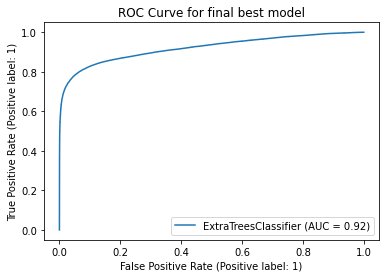

In [231]:
from sklearn.metrics import accuracy_score,plot_roc_curve
#Ploting ROC curve for final best model
plot_roc_curve(Final_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

**ExtraTreesClassifier is best model with accuracy score of 92%**

In [ ]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"micro_credit_defaulters.pkl")

note: saved the model and while loading the model for prediction my computer hanged.I couldn't restart the model training as it is taking more than 36hours to run all codes.so wrote the codes and converted in raw notebook. 